# Import and Instal Dependencies

In [1]:
# !pip install seaborn

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

2024-06-16 21:51:53.011867: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 21:51:54.392560: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-06-16 21:51:58.170205: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:51:58.355894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:51:58.355962: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# Gathering Data

## Export Data

In [3]:
csv_path = '../dataset/momentum_v4.csv' # where the file located

dataset = pd.read_csv(csv_path) # read csv file
dataset

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,1,0.022576,-0.666515,-0.249442,0.999425,0.034886,-0.696387,-0.242715,0.999159,0.035232,...,0.335569,0.859195,0.289779,0.732803,0.134884,0.917380,0.129970,0.759069,0.283571,0.910452
1,1,0.022506,-0.672231,-0.206179,0.999471,0.024353,-0.706390,-0.188558,0.999222,0.024641,...,0.218499,0.868731,-0.140719,0.684315,0.353654,0.909887,-0.234395,0.737706,0.170090,0.914369
2,1,0.105170,-0.666515,0.227311,0.999425,0.091145,-0.696387,0.227640,0.999159,0.090619,...,-0.213752,0.859195,-0.318398,0.732803,0.028076,0.917380,-0.254343,0.759069,-0.180595,0.910452
3,1,-0.167304,-0.672231,-0.122580,0.999471,-0.151119,-0.706390,-0.115369,0.999222,-0.150126,...,0.328313,0.868731,0.235913,0.684315,0.298693,0.909887,0.030104,0.737706,0.288037,0.914369
4,1,0.025765,-0.671703,-0.208894,0.999349,0.031494,-0.702946,-0.196547,0.999131,0.031832,...,0.295454,0.843729,0.304032,0.707144,0.088295,0.882272,0.195165,0.713902,0.235004,0.873166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11453,1,-0.013484,-0.656904,0.002252,0.999845,-0.013370,-0.697304,-0.018323,0.999849,-0.014201,...,0.267477,0.819054,-0.335590,0.755702,0.318845,0.907967,-0.244147,0.774389,0.396837,0.889305
11454,1,-0.004840,-0.649427,-0.024706,0.999857,0.003195,-0.696293,-0.023345,0.999861,0.003557,...,-0.091747,0.800762,-0.297798,0.756370,-0.290645,0.914191,-0.340198,0.757765,-0.177144,0.885069
11455,1,0.003596,-0.657467,-0.080333,0.999861,-0.005340,-0.699367,-0.063598,0.999860,-0.004801,...,-0.096895,0.817633,0.371585,0.786010,-0.067379,0.907194,0.300886,0.801007,-0.184004,0.894704
11456,1,0.024706,-0.649427,-0.004840,0.999857,0.023345,-0.696293,0.003195,0.999861,0.022797,...,-0.261063,0.800762,0.290645,0.756370,-0.297798,0.914191,0.177144,0.757765,-0.340198,0.885069


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11458 entries, 0 to 11457
Columns: 133 entries, class to v33
dtypes: float64(132), int64(1)
memory usage: 11.6 MB


This dataset has 11550 rows with 2 class.
- 0 => Not Using Momentum
- 1 => Using Momentum

# Assessing Data

In [5]:
# check information about dataset
dataset.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11458 entries, 0 to 11457
Data columns (total 133 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    class   11458 non-null  int64  
 1    x1      11458 non-null  float64
 2    y1      11458 non-null  float64
 3    z1      11458 non-null  float64
 4    v1      11458 non-null  float64
 5    x2      11458 non-null  float64
 6    y2      11458 non-null  float64
 7    z2      11458 non-null  float64
 8    v2      11458 non-null  float64
 9    x3      11458 non-null  float64
 10   y3      11458 non-null  float64
 11   z3      11458 non-null  float64
 12   v3      11458 non-null  float64
 13   x4      11458 non-null  float64
 14   y4      11458 non-null  float64
 15   z4      11458 non-null  float64
 16   v4      11458 non-null  float64
 17   x5      11458 non-null  float64
 18   y5      11458 non-null  float64
 19   z5      11458 non-null  float64
 20   v5      11458 non-null  float64
 21   x6      11

In [6]:
# check for null value
dataset.isna().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v32      0
x33      0
y33      0
z33      0
v33      0
Length: 133, dtype: int64

In [7]:
# check for duplicate value
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 228 rows


Found 228 rows of duplicated value

In [8]:
# Drop Duplicated data
dataset.drop_duplicates(inplace=True)
print("Duplicate Found : {} rows".format(dataset.duplicated().sum()))

Duplicate Found : 0 rows


# Data Preprocessing

In [9]:
# Check Ratio For the labels
for i in range(2):
    print("Class {} : {}".format(i, dataset['class'].value_counts()[i]))

Class 0 : 5230
Class 1 : 6000


The dataset is imbalanced, so we try to solve it with the downsampling method.

In [10]:
# Dividing the dataset based on class
not_momentum_dataset = dataset[dataset['class']==0]
momentum_dataset = dataset[dataset['class']==1]


print(not_momentum_dataset.shape)
print(momentum_dataset.shape)


(5230, 133)
(6000, 133)


In [11]:
# Balancing the data by minority class, which is close dataset
from sklearn.utils import resample

momentum_dataset = resample(momentum_dataset,
                          replace = True,
                          n_samples = len(not_momentum_dataset),
                          random_state=42)

In [12]:
print(not_momentum_dataset.shape)
print(momentum_dataset.shape)

(5230, 133)
(5230, 133)


class
0    5230
1    5230
Name: count, dtype: int64


<Axes: ylabel='Type'>

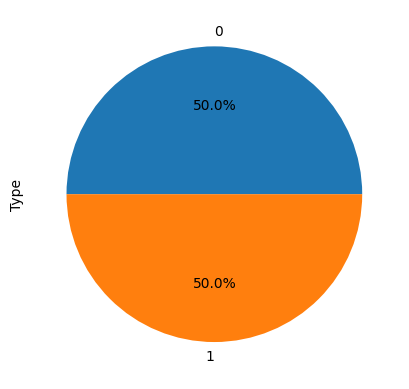

In [13]:
dataset_balanced = pd.concat([not_momentum_dataset, momentum_dataset], ignore_index=True)

print(dataset_balanced["class"].value_counts())

dataset_balanced.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

**Dataset Balanced!**

## Feature Engineering

In [14]:
dataset_balanced

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,0,-0.033906,-0.627808,-0.112464,0.999964,-0.034514,-0.662512,-0.097975,0.999943,-0.033886,...,-0.008814,0.688619,0.133269,0.883040,-0.164098,0.911374,-0.089840,0.881163,-0.119154,0.909632
1,0,0.053238,-0.625963,-0.090156,0.999963,0.056094,-0.659846,-0.075812,0.999941,0.056665,...,-0.024645,0.675352,0.124656,0.889289,-0.151522,0.913994,-0.082038,0.886177,-0.134971,0.910878
2,0,0.114350,-0.627808,0.026868,0.999964,0.102106,-0.662512,0.019097,0.999943,0.101332,...,-0.059898,0.688619,0.075478,0.883040,0.197464,0.911374,0.148110,0.881163,-0.018227,0.909632
3,0,0.091183,-0.625963,-0.051459,0.999963,0.086485,-0.659846,-0.037608,0.999941,0.086778,...,-0.057454,0.675352,0.183716,0.889289,-0.068894,0.913994,-0.003562,0.886177,-0.157907,0.910878
4,0,0.028863,-0.612379,-0.020878,0.999928,0.034993,-0.649260,-0.000928,0.999902,0.035487,...,-0.020789,0.444030,0.124895,0.847609,-0.147966,0.802666,-0.094188,0.862075,-0.140824,0.744939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,1,0.069218,-0.630902,-0.186647,0.999781,0.084512,-0.662931,-0.164808,0.999588,0.084873,...,0.138238,0.768946,0.111699,0.766821,-0.147973,0.873120,-0.054780,0.728246,0.090620,0.892633
10456,1,0.032226,-0.649431,-0.013730,0.999961,0.040695,-0.681819,0.012132,0.999931,0.041132,...,-0.063969,0.616964,0.062519,0.890197,-0.181380,0.944408,-0.106260,0.880751,-0.179667,0.916421
10457,1,-0.080935,-0.651509,0.038168,0.999918,-0.068332,-0.686774,0.026483,0.999860,-0.068165,...,-0.033767,0.484015,-0.060304,0.862296,-0.123351,0.830782,0.010219,0.863370,0.030014,0.800670
10458,1,-0.021139,-0.561246,0.112935,0.999861,-0.030036,-0.596522,0.132505,0.999777,-0.029980,...,-0.203766,0.663915,0.326037,0.891455,-0.216281,0.917397,0.249490,0.869401,-0.280342,0.900975


The output of the mediapipe consists of 33 coordinate points from head to toe. Each point will have 4 values, namely `X, Y, and Z` (For point coordinates) and `visibility` for the value of the point confidence.

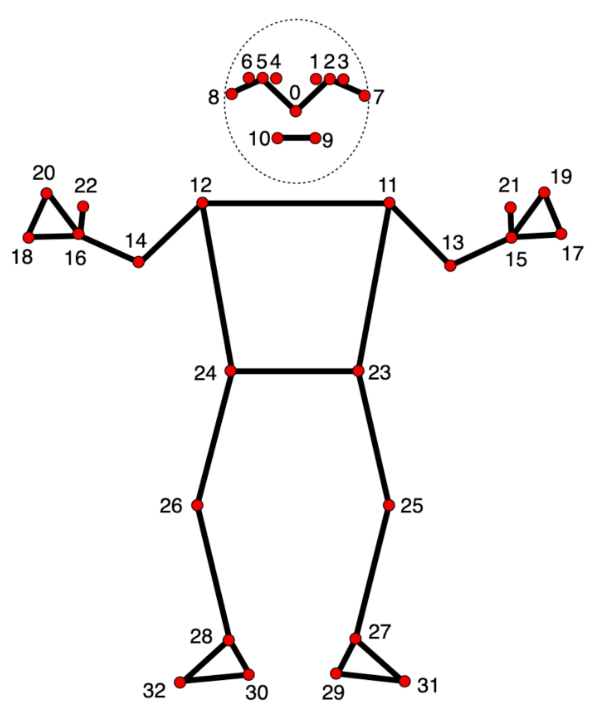

In [15]:
# see corelation map each data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataset_balanced.corr())

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,z3,v3,x4,y4,z4,v4,x5,y5,z5,v5,x6,y6,z6,v6,x7,y7,z7,v7,x8,y8,z8,v8,x9,y9,z9,v9,x10,y10,z10,v10,x11,y11,z11,v11,x12,y12,z12,v12,x13,y13,z13,v13,x14,y14,z14,v14,x15,y15,z15,v15,x16,y16,z16,v16,x17,y17,z17,v17,x18,y18,z18,v18,x19,y19,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21,x22,y22,z22,v22,x23,y23,z23,v23,x24,y24,z24,v24,x25,y25,z25,v25,x26,y26,z26,v26,x27,y27,z27,v27,x28,y28,z28,v28,x29,y29,z29,v29,x30,y30,z30,v30,x31,y31,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
class,1.000000,0.007623,0.049250,-0.007521,-0.319351,-0.001751,0.073296,-0.014160,-0.300559,-0.002045,0.072499,-0.013923,-0.309326,-0.001843,0.072346,-0.013978,-0.297084,0.008702,0.069565,-0.014732,-0.339712,0.008722,0.070952,-0.014713,-0.343263,0.008632,0.070073,-0.014737,-0.345566,-0.029068,0.098947,-0.035574,-0.288854,0.013906,0.094922,-0.042774,-0.372686,-0.001775,0.054734,-0.014883,-0.299094,0.013029,0.047973,-0.015859,-0.355981,-0.034300,0.004922,-0.041187,-0.234951,0.028193,-0.022698,-0.062128,-0.299585,-0.063622,-0.073943,-0.012264,-0.332911,0.064830,-0.082958,-0.036249,-0.310060,-0.048358,-0.082215,0.015400,-0.289026,0.046858,-0.087953,-0.010532,-0.328795,-0.042892,-0.090566,0.019771,-0.223904,0.041795,-0.097649,-0.003345,-0.298727,-0.041268,-0.086369,0.020287,-0.212603,0.036171,-0.088917,-0.004943,-0.297745,-0.046432,-0.082625,0.015975,-0.190560,0.043861,-0.088017,-0.009817,-0.278246,-0.026341,0.151302,0.034193,0.042251,0.026320,-0.149088,-0.033638,-0.001247,0.036501,-0.509410,-0.044395,-0.219697,-0.040979,-0.504803,-0.084722,-0.102534,0.008775,-0.619281,0.018588,-0.465957,-0.048703,-0.636691,0.000592,-0.398686,0.007374,-0.616712,0.026277,0.118103,-0.048931,-0.635893,0.010265,0.065201,0.010916,-0.595521,0.064955,-0.422018,-0.030223,-0.608153,0.049971,-0.369680
x1,0.007623,1.000000,-0.022320,-0.000220,-0.003248,0.986223,-0.017776,0.012965,-0.002897,0.985644,-0.017812,0.013889,-0.001917,0.985715,-0.017650,0.013689,-0.002150,0.969186,-0.023533,-0.038564,-0.009199,0.970439,-0.023548,-0.038125,-0.013039,0.969631,-0.023514,-0.038061,-0.015188,0.679938,-0.006246,0.116040,0.002640,0.619639,-0.035085,-0.122369,-0.012763,0.964738,-0.018923,0.047035,0.002538,0.970071,-0.026965,-0.027975,-0.004115,0.429255,-0.012558,0.212908,0.010636,0.402425,-0.029415,-0.182534,-0.000392,0.380026,-0.014515,0.254942,0.003635,0.304988,-0.009407,-0.245679,0.003005,0.436112,-0.014671,0.209224,0.000483,0.389282,-0.010530,-0.209907,0.004499,0.463758,-0.015120,0.190412,-0.000623,0.435195,-0.011999,-0.194576,0.000729,0.485521,-0.014091,0.175882,-0.001090,0.436386,-0.012546,-0.181678,0.000465,0.451936,-0.014403,0.200231,0.000341,0.408231,-0.010607,-0.197517,0.001352,0.033717,0.048142,0.339609,0.004530,-0.037019,-0.048827,-0.338962,0.000426,-0.110913,0.005372,0.126635,0.005534,-0.141180,-0.008999,-0.205398,-0.004016,-0.417754,0.002627,0.078742,-0.030573,-0.449130,-0.017712,-0.066138,-0.033826,-0.423626,0.002050,0.077777,-0.029253,-0.455040,-0.018021,-0.057688,-0.031068,-0.319957,0.004937,0.056923,-0.034878,-0.345105,-0.017338,-0.075399,-0.038847
y1,0.049250,-0.022320,1.000000,0.227164,0.171175,-0.021289,0.987217,0.236081,0.175265,-0.021396,0.987148,0.236262,0.196888,-0.021512,0.987082,0.236227,0.181690,-0.020193,0.991522,0.235558,0.172792,-0.020217,0.991588,0.235271,0.172985,-0.020261,0.991511,0.235562,0.152043,-0.013562,0.868715,0.241196,0.192206,-0.014721,0.902426,0.233383,0.190711,-0.024819,0.991064,0.244327,0.155447,-0.022550,0.993996,0.244665,0.170741,-0.012970,0.816718,0.213092,0.239541,-0.010721,0.786307,0.208025,0.270417,-0.011647,0.576869,0.140093,-0.035710,-0.010600,0.562941,0.139628,-0.010678,-0.015295,0.507530,0.089658,-0.062865,-0.010423,0.504248,0.098997,0.013074,-0.014758,0.497376,0.088376,-0.070396,-0.007145,0.496416,0.101328,-0.005464,-0.009221,0.491548,0.095838,-0.093148,-0.012627,0.492232,0.102433,-0.016132,-0.014101,0.503996,0.094021,-0.132733,-0.011847,0.500019,0.101892,-0.045341,-0.009545,0.099325,0.007249,0.127880,0.009297,-0.091379,-0.008039

Feature `v`s (`visibility`) have small correlation to class feature. So, we can drop them from the table. 

In [16]:
# Find all visibility columns
columns = dataset_balanced.columns
columns_to_drop = [column for column in columns if column.startswith('v')]
print(columns_to_drop)

['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33']


In [17]:
# Drop v columns
dataset_xyz = dataset_balanced.drop(columns=columns_to_drop, inplace=False)
dataset_xyz

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,-0.033906,-0.627808,-0.112464,-0.034514,-0.662512,-0.097975,-0.033886,-0.663048,-0.097444,...,-0.044945,-0.074252,0.810765,-0.008814,0.133269,0.883040,-0.164098,-0.089840,0.881163,-0.119154
1,0,0.053238,-0.625963,-0.090156,0.056094,-0.659846,-0.075812,0.056665,-0.660333,-0.075410,...,-0.035815,-0.072222,0.812864,-0.024645,0.124656,0.889289,-0.151522,-0.082038,0.886177,-0.134971
2,0,0.114350,-0.627808,0.026868,0.102106,-0.662512,0.019097,0.101332,-0.663048,0.019376,...,0.123862,0.044759,0.810765,-0.059898,0.075478,0.883040,0.197464,0.148110,0.881163,-0.018227
3,0,0.091183,-0.625963,-0.051459,0.086485,-0.659846,-0.037608,0.086778,-0.660333,-0.036974,...,0.026864,-0.050224,0.812864,-0.057454,0.183716,0.889289,-0.068894,-0.003562,0.886177,-0.157907
4,0,0.028863,-0.612379,-0.020878,0.034993,-0.649260,-0.000928,0.035487,-0.649658,-0.000517,...,-0.027403,-0.071805,0.800960,-0.020789,0.124895,0.847609,-0.147966,-0.094188,0.862075,-0.140824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,1,0.069218,-0.630902,-0.186647,0.084512,-0.662931,-0.164808,0.084873,-0.663520,-0.164085,...,-0.056124,-0.047969,0.610439,0.138238,0.111699,0.766821,-0.147973,-0.054780,0.728246,0.090620
10456,1,0.032226,-0.649431,-0.013730,0.040695,-0.681819,0.012132,0.041132,-0.682454,0.012663,...,-0.059426,-0.094810,0.816306,-0.063969,0.062519,0.890197,-0.181380,-0.106260,0.880751,-0.179667
10457,1,-0.080935,-0.651509,0.038168,-0.068332,-0.686774,0.026483,-0.068165,-0.687246,0.025879,...,-0.172660,0.097076,0.796589,-0.033767,-0.060304,0.862296,-0.123351,0.010219,0.863370,0.030014
10458,1,-0.021139,-0.561246,0.112935,-0.030036,-0.596522,0.132505,-0.029980,-0.597163,0.133324,...,-0.153187,0.183770,0.804083,-0.203766,0.326037,0.891455,-0.216281,0.249490,0.869401,-0.280342


Now we only have dataset with XYZ coordinates

## Feature Selection

Because, we predict momentum while doing pull-ups, all coordinates are matter. So, we don't try to drop some columns.

In [18]:
# dataset xyz
dataset_xyz # complete dataset

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0,-0.033906,-0.627808,-0.112464,-0.034514,-0.662512,-0.097975,-0.033886,-0.663048,-0.097444,...,-0.044945,-0.074252,0.810765,-0.008814,0.133269,0.883040,-0.164098,-0.089840,0.881163,-0.119154
1,0,0.053238,-0.625963,-0.090156,0.056094,-0.659846,-0.075812,0.056665,-0.660333,-0.075410,...,-0.035815,-0.072222,0.812864,-0.024645,0.124656,0.889289,-0.151522,-0.082038,0.886177,-0.134971
2,0,0.114350,-0.627808,0.026868,0.102106,-0.662512,0.019097,0.101332,-0.663048,0.019376,...,0.123862,0.044759,0.810765,-0.059898,0.075478,0.883040,0.197464,0.148110,0.881163,-0.018227
3,0,0.091183,-0.625963,-0.051459,0.086485,-0.659846,-0.037608,0.086778,-0.660333,-0.036974,...,0.026864,-0.050224,0.812864,-0.057454,0.183716,0.889289,-0.068894,-0.003562,0.886177,-0.157907
4,0,0.028863,-0.612379,-0.020878,0.034993,-0.649260,-0.000928,0.035487,-0.649658,-0.000517,...,-0.027403,-0.071805,0.800960,-0.020789,0.124895,0.847609,-0.147966,-0.094188,0.862075,-0.140824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455,1,0.069218,-0.630902,-0.186647,0.084512,-0.662931,-0.164808,0.084873,-0.663520,-0.164085,...,-0.056124,-0.047969,0.610439,0.138238,0.111699,0.766821,-0.147973,-0.054780,0.728246,0.090620
10456,1,0.032226,-0.649431,-0.013730,0.040695,-0.681819,0.012132,0.041132,-0.682454,0.012663,...,-0.059426,-0.094810,0.816306,-0.063969,0.062519,0.890197,-0.181380,-0.106260,0.880751,-0.179667
10457,1,-0.080935,-0.651509,0.038168,-0.068332,-0.686774,0.026483,-0.068165,-0.687246,0.025879,...,-0.172660,0.097076,0.796589,-0.033767,-0.060304,0.862296,-0.123351,0.010219,0.863370,0.030014
10458,1,-0.021139,-0.561246,0.112935,-0.030036,-0.596522,0.132505,-0.029980,-0.597163,0.133324,...,-0.153187,0.183770,0.804083,-0.203766,0.326037,0.891455,-0.216281,0.249490,0.869401,-0.280342


# Build Model

## Simple DNN Arch

In [20]:
from sklearn.model_selection import train_test_split

# Split data from the label
train = dataset_xyz.iloc[:, 1:]
label = dataset_xyz.iloc[:, :1] # we use the main dataset to get the label

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(train, label, test_size=0.3, random_state=42, stratify=label)

In [21]:
from keras.utils import to_categorical

# one hot dataset
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [23]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], ))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_xyz = Model(inputs, outputs)
model_xyz.summary()

2024-06-16 21:24:36.511748: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:24:36.511861: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:24:36.511910: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:24:36.763316: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 21:24:36.763391: I external/local_xla/xla/stream_executor

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 99)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,698 (92.57 KB)

 Trainable params: 23,698 (92.57 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_xyz.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model_xyz.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100


I0000 00:00:1718547888.050624    3726 service.cc:145] XLA service 0x7fd7d4005280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718547888.050678    3726 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-06-16 21:24:48.117530: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-16 21:24:48.404149: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 61/229 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.6436

I0000 00:00:1718547890.408122    3726 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


229/229 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7463 - loss: 0.5420 - val_accuracy: 0.8499 - val_loss: 0.3588
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8388 - loss: 0.3719 - val_accuracy: 0.8576 - val_loss: 0.3375
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3337 - val_accuracy: 0.8547 - val_loss: 0.3319
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8617 - loss: 0.3152 - val_accuracy: 0.8690 - val_loss: 0.3058
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8727 - loss: 0.3049 - val_accuracy: 0.8878 - val_loss: 0.2802
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8771 - loss: 0.2879 - val_accuracy: 0.8633 - val_loss: 0.3373
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8881 - loss: 0.2766 - val_accuracy: 0.8853 - val_loss: 0.2800
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8977 - loss: 0.2472 - val_accuracy: 0.89

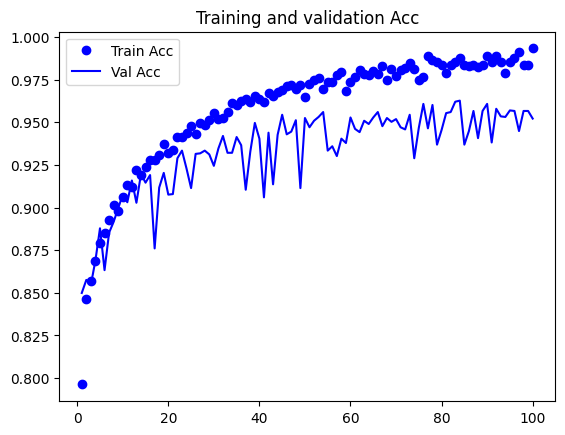

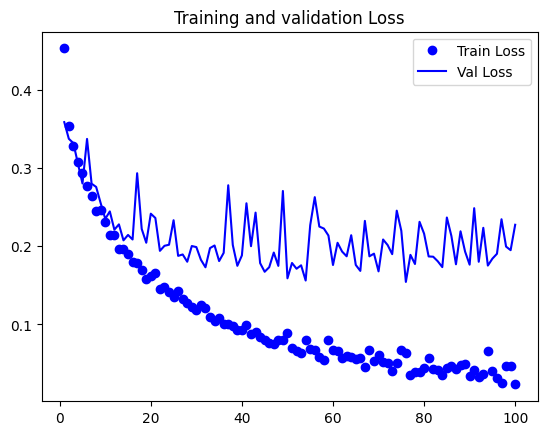

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [27]:
dir_path = '../model/xyz_DNN/'
tf.saved_model.save(model_xyz, dir_path)

INFO:tensorflow:Assets written to: ../model/xyz_DNN/assets


INFO:tensorflow:Assets written to: ../model/xyz_DNN/assets


## LTSM Model

In [125]:
# Transform dataset to fit in LSTM model

TIMESTEPS = 30

X = []
y = []

labels = dataset_xyz.iloc[:, :1]

datasets = dataset_xyz.iloc[:, 1:].values
n_samples = len(datasets)

for i in range(TIMESTEPS, n_samples):
    X.append(datasets[i-TIMESTEPS:i, :])
    y.append(labels[i-TIMESTEPS:i])
    
X = np.array(X)
y = np.array(y)
y = np.reshape(y[:, :1, :], (X.shape[0],1))

print(X.shape, y.shape)
# print(y)


(10430, 30, 99) (10430, 1)


In [126]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# one hot dataset
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [127]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras import losses, optimizers

In [131]:
# build model from scratch with functional API

inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = layers.LSTM(64, return_sequences=True, activation='relu')(inputs)
x = layers.LSTM(128, return_sequences=True, activation='relu')(x)
x = layers.LSTM(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(2, activation='sigmoid')(x)
model_LSTM = Model(inputs, outputs)
model_LSTM.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30, 99)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        41,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196,514 (767.63 KB)

 Trainable params: 196,514 (767.63 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model_LSTM.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
history = model_LSTM.fit(X_train, y_train, validation_data=(X_val, y_val),
                  batch_size=32, epochs=100)

Epoch 1/100


I0000 00:00:1718552117.563448   21420 service.cc:145] XLA service 0xe147a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718552117.563501   21420 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-06-16 22:35:17.669374: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-16 22:35:18.248878: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  3/229 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5052 - loss: 0.6931 

I0000 00:00:1718552123.884165   21420 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.7996 - loss: 0.4143 - val_accuracy: 0.9907 - val_loss: 0.0382
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9786 - loss: 0.0594 - val_accuracy: 0.9974 - val_loss: 0.0184
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9971 - loss: 0.0134 - val_accuracy: 0.9642 - val_loss: 0.1057
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8916 - loss: 2.5108 - val_accuracy: 0.9319 - val_loss: 0.2891
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9630 - loss: 0.1255 - val_accuracy: 0.9658 - val_loss: 0.1116
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9902 - loss: 0.0322 - val_accuracy: 0.9923 - val_loss: 0.0245
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9907 - loss: 0.0319 - val_accuracy: 0.9962 - val_loss: 0.0146
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9933 - loss: 0.0245 - val_accurac

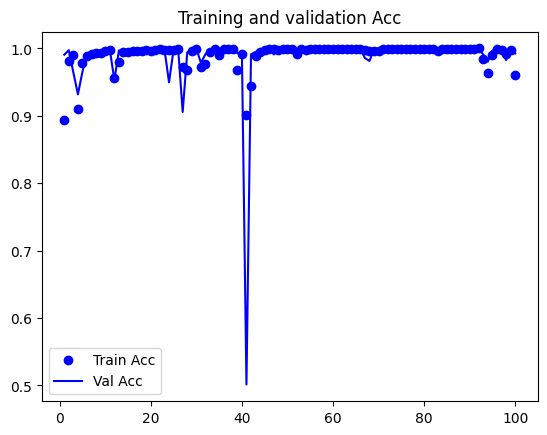

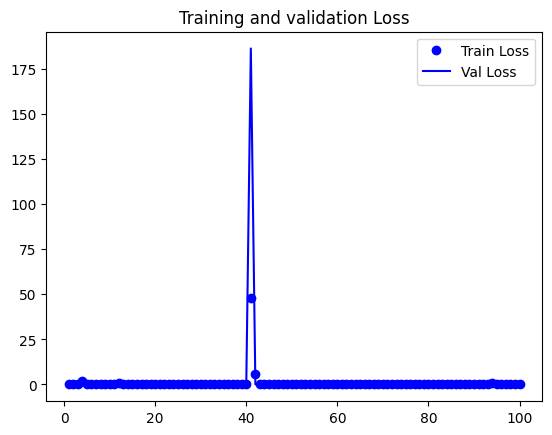

In [134]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Train Acc')
plt.plot(epochs, val_acc, 'b', label='Val Acc')
plt.title('Training and validation Acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [136]:
dir_path = '../Model/xyz_LSTM/'
tf.saved_model.save(model_LSTM, dir_path)

INFO:tensorflow:Assets written to: ../Model/xyz_LSTM/assets


INFO:tensorflow:Assets written to: ../Model/xyz_LSTM/assets
